In [10]:
import pandas as pd

loan_data = pd.read_csv('../../datasets/loan_data.csv')
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
# missing values
loan_data.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [13]:
# duplicates
loan_data.duplicated().sum()

0

In [14]:
target = loan_data["not.fully.paid"].values
loan_data = loan_data.drop(columns=["purpose", "not.fully.paid"])
loan_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


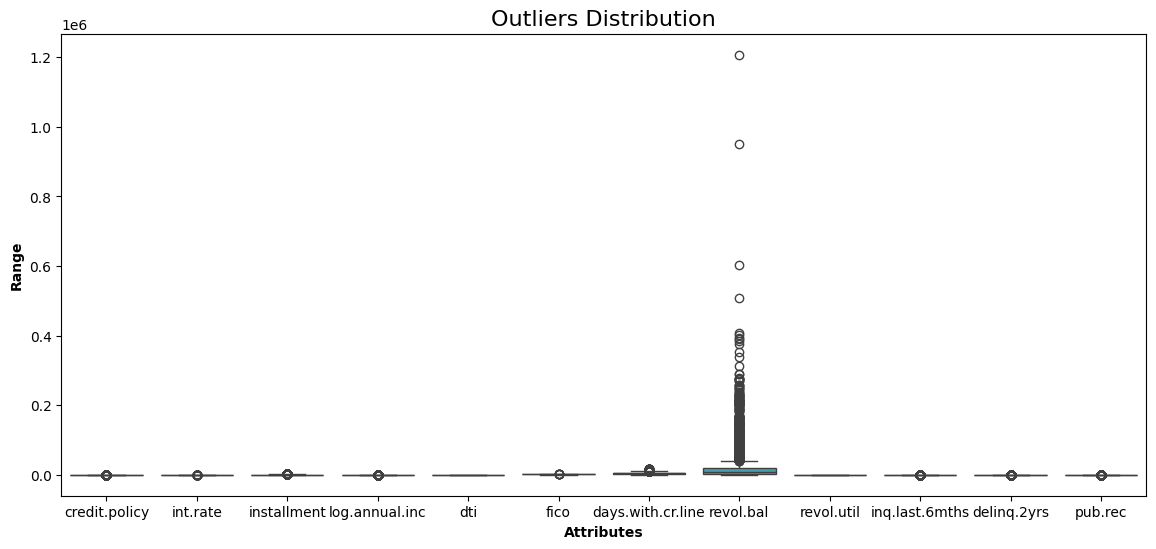

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns


def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
   
show_boxplot(loan_data)

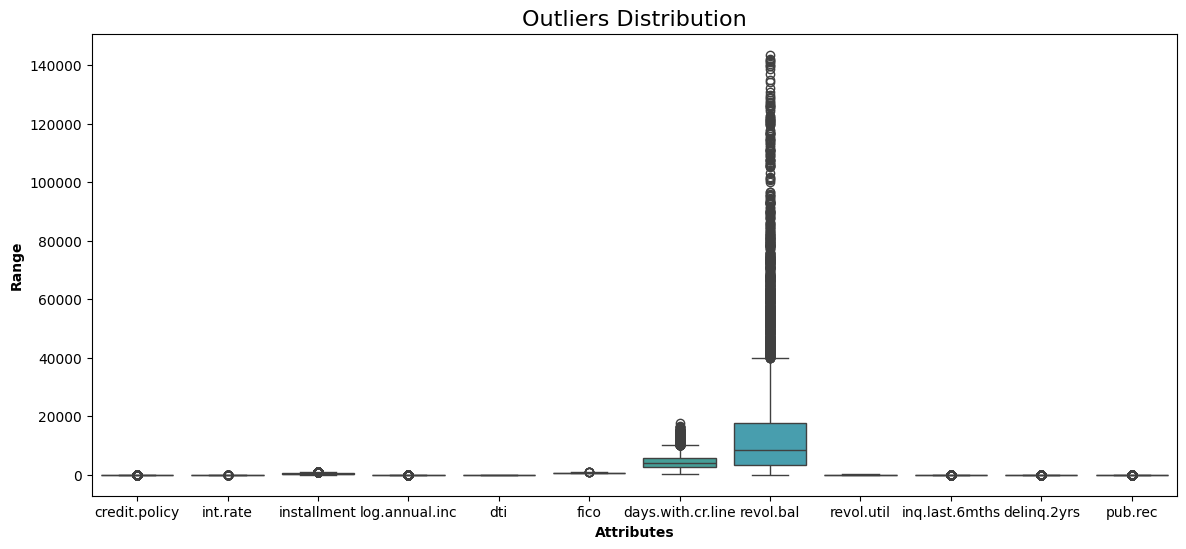

In [16]:
def remove_outliers(data):
    df = data.copy()
       
    for col in list(df.columns):
          Q1 = df[str(col)].quantile(0.05)
          Q3 = df[str(col)].quantile(0.95)
          IQR = Q3 - Q1
          lower_bound = Q1 - 1.5*IQR
          upper_bound = Q3 + 1.5*IQR
          df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]
    return df

loan_data_wo_outliers = remove_outliers(loan_data)
show_boxplot(loan_data_wo_outliers)

In [17]:
loan_data_wo_outliers.shape

(9319, 12)

In [18]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()

scaled_data = data_scaler.fit_transform(loan_data_wo_outliers)
scaled_data.shape

(9319, 12)

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

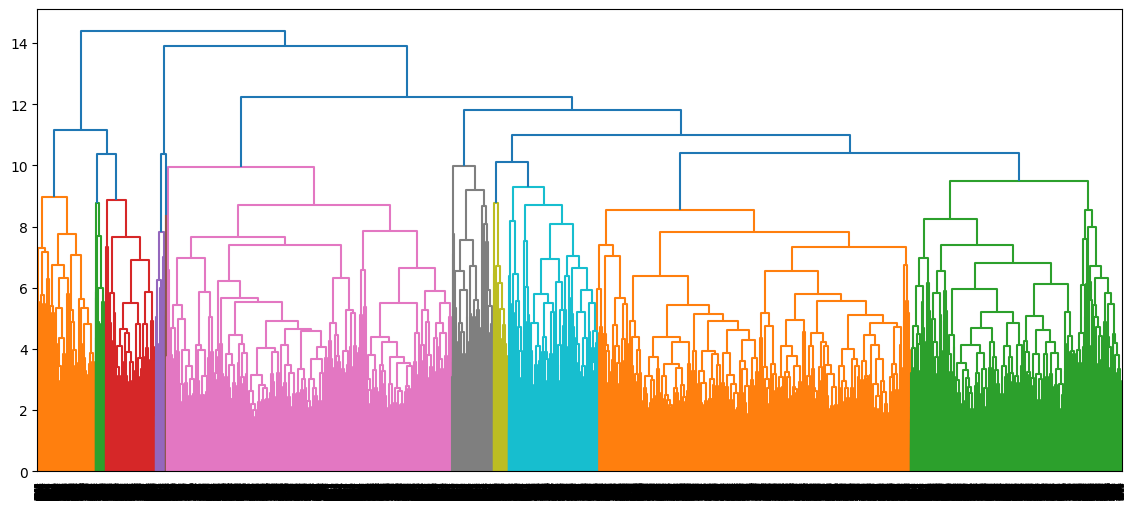

In [20]:
dendrogram(complete_clustering)
plt.show()

<Axes: xlabel='Cluster', ylabel='fico'>

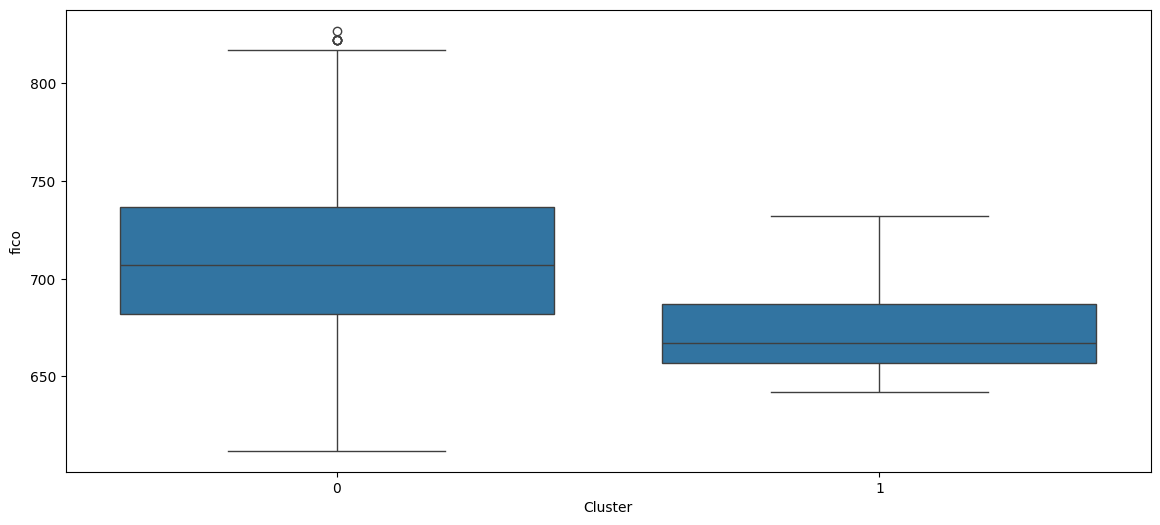

In [21]:
from scipy.cluster.hierarchy import cut_tree

cluster_labels = cut_tree(average_clustering, n_clusters=2).reshape(-1, )
loan_data_wo_outliers["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='fico', data=loan_data_wo_outliers)